In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)
A = iris.data
print(iris.target.shape)
print(iris.target)
print(iris)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
  

In [3]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
  if iris.target[i]!=1:
    y[i]=-1
#Create an index array
indexarr = np.arange(n)
np.random.seed(59) #index array
print("Index array:")
np.random.shuffle(indexarr) 
print(indexarr)#shuffle the indices

Index array:
[ 91  31 131 125 119 115  89  48 143 147 124  58  79  49  43  23 109  92
  20 104  75 137 114 110  82 144  61  47  28   0  27 133  71 149 100 112
 108  19  30 129 148  96 126  77   1  10  81  18  98   8  63  12 146  22
  26 139  99  16  34  62  15  80  25 135 136  56  24 134 142 117  94  13
  65 123  88  46  60  85   5 141  42 132  38 101  86  70   7  36  11  69
   3 127 113 105 111  52  97 103   6  72  54  17 116  55   9  37  78  21
  59  84 138  35 120 106 145  39  44  32   2  87 140  51 121  29  14   4
  76  40  74  41  93 130  68  50 122  90 102  33 118  66  73  45  83  64
  67  95 128  57  53 107]


In [5]:
train_data = []
train_label = []
test_data = []
test_label = []
counter = 1
for i in indexarr:
  if counter <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  counter = counter + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [6]:
print(f"Shape of train data = {train_data.shape}")
print(f"Shape of test data = {test_data.shape}")
print(f"Shape of train label= {train_label.shape}")
print(f"Shape of test label = {test_label.shape}")

Shape of train data = (120, 4)
Shape of test data = (30, 4)
Shape of train label= (120, 1)
Shape of test label = (30, 1)


In [7]:
def predict(w,x):
  if np.dot(w,x) > 0:
    return 1
  else:
    return -1

In [8]:
def compute_accuracy(data,labels,model_w):
  n=data.shape[0]
  c=0
  for i in range(n):
    if predict(model_w,data[i])==labels[i]:
      c+=1
  return c*100/n

## **Question 1:**

The appropriate choice of $f_i(w)$ can be:


*   **For Hinge Loss:**
$$f_i(w)=\frac{λ}{2n}\mathbf{w^Tw} +\frac{1}{n}\text{max}\{0,1-y_i\mathbf{w^T}\mathbf{x}_i\}$$
*   **For logistic loss:**
$$f_i(w)=\frac{λ}{2n}\mathbf{w^Tw} +\frac{1}{n}\log(1+exp(-y_i\mathbf{w^T}\mathbf{x}_i))$$
* **For Squared Hinge Loss:**
$$f_i(w)=\frac{λ}{2n}\mathbf{w^Tw} +\frac{1}{n}(\text{max}\{0,1-y_i\mathbf{w^T}\mathbf{x}_i\})^2$$

## **Question 2:**

In [9]:
def compute_loss_h(w,x,y):
  return max(0,1 - np.dot(w,x) * y)

## **Question 3:**

In [10]:
def compute_objfnval(data,labels,model_w,lamda):
  n=data.shape[0]
  loss=0
  for i in range(n):
    loss+=compute_loss_h(model_w,data[i],labels[i])/n + 1/(2*n) * lamda * np.linalg.norm(model_w)**2
  return loss

## **Question 4:**

The (sub-)gradient is denoted by $g_i(w) = ∇_wf_i(w)$



\begin{equation}
g_i(w) = 
\left\{
    \begin{array}{lr}
        \frac{λ}{n}w, & \text{if } y_iw^Tx_i \geq 1\\
        \frac{λ}{n}w - \frac{1}{n}y_ix_i, & y_iw^Tx_i \leq 1
    \end{array}
\right\}
\end{equation}

In [11]:
def compute_grad_loss_h(x,y,model_w, lamda):
  x=np.reshape(x,[4,])
  model_w=np.reshape(model_w,[4,])
  if y*np.dot(model_w,x)>1:
    grad=(lamda/n)*model_w
  else:
    grad=((lamda/n)*model_w) - (1/n)*(y*x)
  return grad

## **Question 5:**

In [12]:
def OPT1(data,label,lamda,num_epochs):
  t = 1
  w=np.ones([4,])
  f_val=[]
  list_of_train_acc=[]
  list_of_test_acc=[] 
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step=1/t
      w=np.subtract(w , step * compute_grad_loss_h(data[i], label[i], w,lamda))
      t = t+1
      if t>10000:
        t=1
    f_val.append(compute_objfnval(data,label,w,lamda))
    list_of_test_acc.append(compute_accuracy(test_data,test_label,w))
    list_of_train_acc.append(compute_accuracy(data,label,w))

  return w, f_val, list_of_test_acc, list_of_train_acc

## **Question 6.a:**

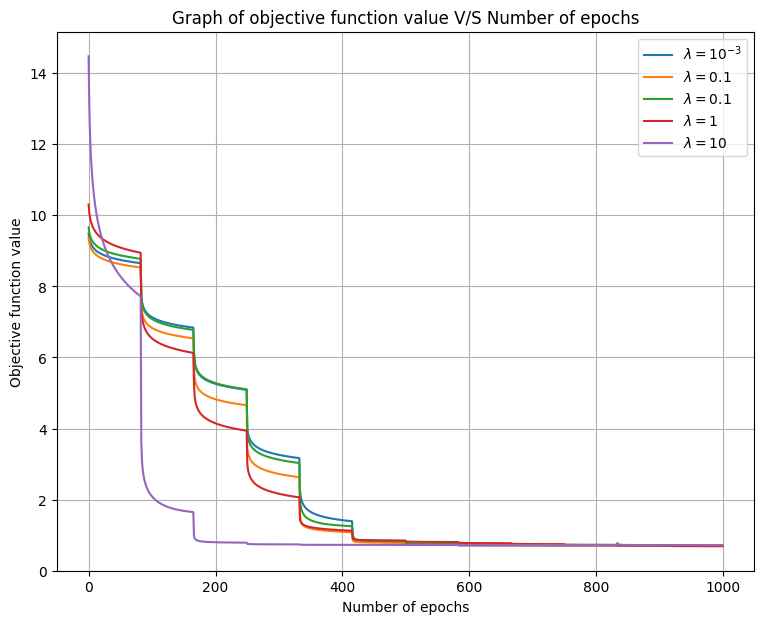

In [13]:
num_epochs = 1000
lambdas = [1e-3,1e-2,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in lambdas:
  result=OPT1(train_data,train_label,lamda,num_epochs)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Objective function value")
  plt.title("Graph of objective function value V/S Number of epochs")
  plt.grid()

## **Question 6.b:**

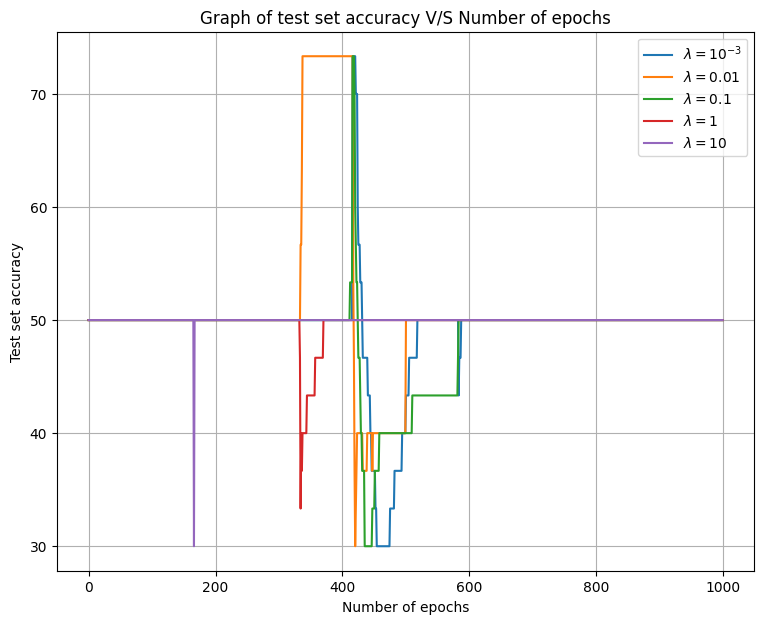

In [14]:
num_epochs=1000
lambdas=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in lambdas:
  result=OPT1(train_data,train_label,lamda,num_epochs)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Test set accuracy")
  plt.title("Graph of test set accuracy V/S Number of epochs")
  plt.grid()

## **Question 6.c:**

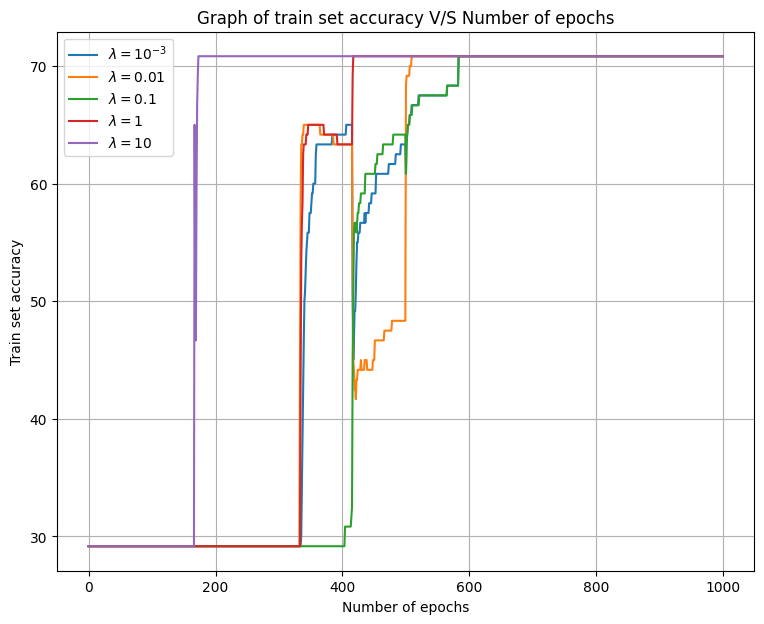

In [15]:
num_epochs=1000
lambdas=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in lambdas:
  result=OPT1(train_data,train_label,lamda,num_epochs)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Train set accuracy")
  plt.title("Graph of train set accuracy V/S Number of epochs")
  plt.grid()


## **Question 6.d:**

In [16]:
from tabulate import tabulate
head = ["Value of lambda", "Training accuracy","Test accuracy"]
my_data=[[lambdas[i],OPT1(train_data,train_label,lambdas[i],num_epochs)[3][-1],OPT1(train_data,train_label,lambdas[i],num_epochs)[2][-1]] for i in range(len(lambdas))]
print(tabulate(my_data, headers=head, tablefmt="fancy_grid"))

╒═══════════════════╤═════════════════════╤═════════════════╕
│   Value of lambda │   Training accuracy │   Test accuracy │
╞═══════════════════╪═════════════════════╪═════════════════╡
│             0.001 │             70.8333 │              50 │
├───────────────────┼─────────────────────┼─────────────────┤
│             0.01  │             70.8333 │              50 │
├───────────────────┼─────────────────────┼─────────────────┤
│             0.1   │             70.8333 │              50 │
├───────────────────┼─────────────────────┼─────────────────┤
│             1     │             70.8333 │              50 │
├───────────────────┼─────────────────────┼─────────────────┤
│            10     │             70.8333 │              50 │
╘═══════════════════╧═════════════════════╧═════════════════╛


## **Question 6.e:**
From the above plots, we can see that the training and testing accuracy is either following a zig zag pattern or it stays same. \
The above table shows that the training and testing accuracy are same for each value of lambda.\
Training accuracy = $70.833$ and Test accuracy = $50$

## **Question 7:**
We are implementing the criteria in which we are stopping when our training accuracy doesn't improve and the algorithm should run for some fixed no. of iterations(here it is taken as 100).

In [17]:
def compute_loss_h(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))

In [18]:
def compute_objfnval_h(data,labels,w, lamda):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_h(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [19]:
def compute_grad_loss_h(x,y,w,i,lamda):
  l = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/data.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/data.shape[0]
  return l

In [20]:
def OPT2_h(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i,lamda))) 
      t = t+1
    if epoch % 10 == 0:
      list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
      list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
      fval.append(compute_objfnval_h(data,label,w,lamda))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

Since all the lambdas give the same prediction, we check for all values of lambda.

In [21]:
lambda_set = [10**-3,0.01,0.1,  1, 10]
data = train_data
label = train_label
print("Using Hinge loss function with modified criterion:")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_h(train_data,train_label,lamda)
  print("\nlambda", lamda)
  print("Test set accuracy", test_set_accuracy_array[-1])
  print("Train set accuracy", train_set_accuracy_array[-1])

Using Hinge loss function with modified criterion:

lambda 0.001
Test set accuracy 50.0
Train set accuracy 70.83333333333333

lambda 0.01
Test set accuracy 50.0
Train set accuracy 70.83333333333333

lambda 0.1
Test set accuracy 50.0
Train set accuracy 70.83333333333333

lambda 1
Test set accuracy 50.0
Train set accuracy 29.166666666666668

lambda 10
Test set accuracy 50.0
Train set accuracy 70.83333333333333


## **Question 8:**

**For logistic loss with 1000 epochs**

In [22]:
def compute_loss_l(w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(w, np.transpose(x))))))

In [23]:
def compute_objfnval_l(data,labels,w,lamda):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_l(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [24]:
def compute_grad_loss_l(data, label,w ,i,lamda):
  return np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i]))))))/data.shape[0]

In [25]:
def OPT1_l(data, label, lamda, epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  precision = False
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i,lamda))) 
      t = t+1
    if t>10000:
      t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_l(data,label,w,lamda))
  return w, fval, list_of_test_acc, list_of_train_acc

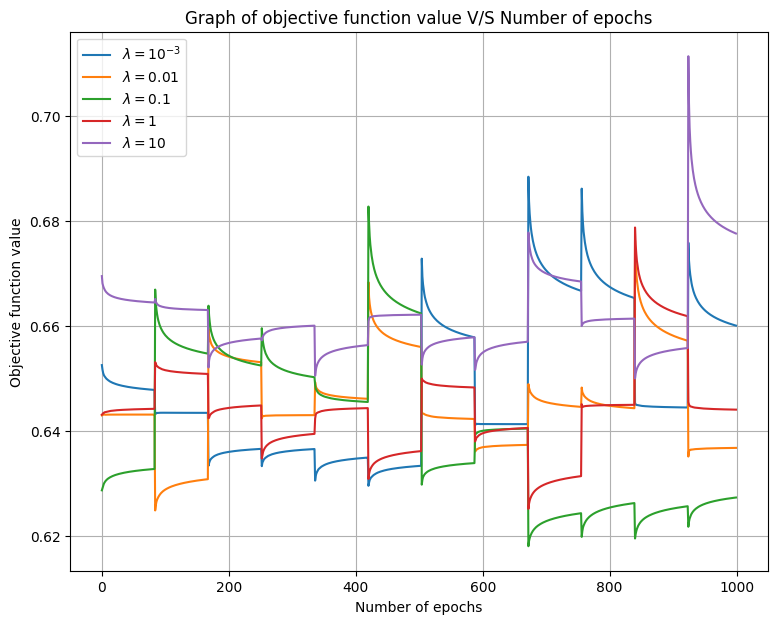

In [26]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_l(train_data,train_label,lamda,num_epochs)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Objective function value")
  plt.title("Graph of objective function value V/S Number of epochs")
  plt.grid()

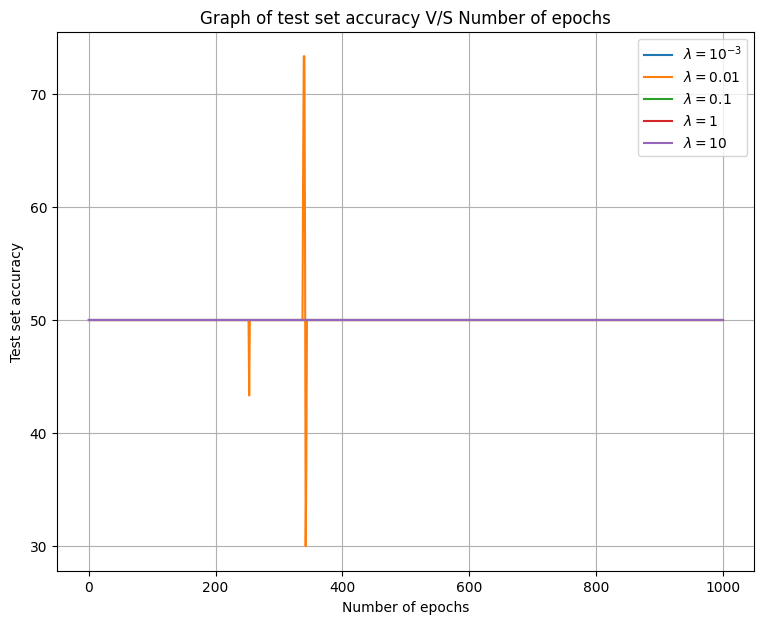

In [27]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_l(train_data,train_label,lamda,num_epochs)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Test set accuracy")
  plt.title("Graph of test set accuracy V/S Number of epochs")
  plt.grid()

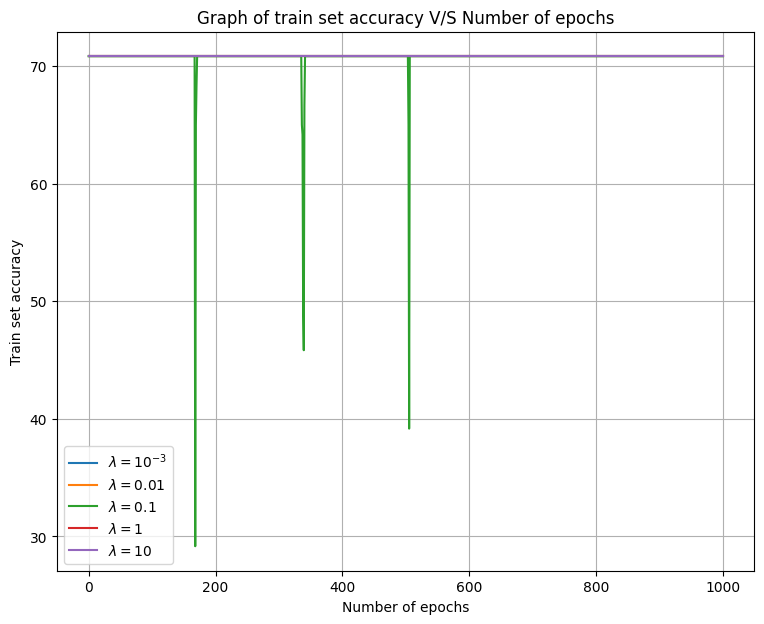

In [28]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_l(train_data,train_label,lamda,num_epochs)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Train set accuracy")
  plt.title("Graph of train set accuracy V/S Number of epochs")
  plt.grid()

In [29]:
from tabulate import tabulate
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT1_l(train_data,train_label,list_of_lamda[i],num_epochs)[3][-1],OPT1_l(train_data,train_label,list_of_lamda[i],num_epochs)[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="fancy_grid"))

╒══════════════════╤═════════════════════╤═════════════════╕
│   value of lamda │   Training accuracy │   Test accuracy │
╞══════════════════╪═════════════════════╪═════════════════╡
│            0.001 │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.01  │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.1   │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            1     │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│           10     │             70.8333 │              50 │
╘══════════════════╧═════════════════════╧═════════════════╛


### **For logistic loss with modified stopping criteria**

In [30]:
def OPT2_l(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval= []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i,lamda))) 
      t = t+1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_l(data,label,w,lamda))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

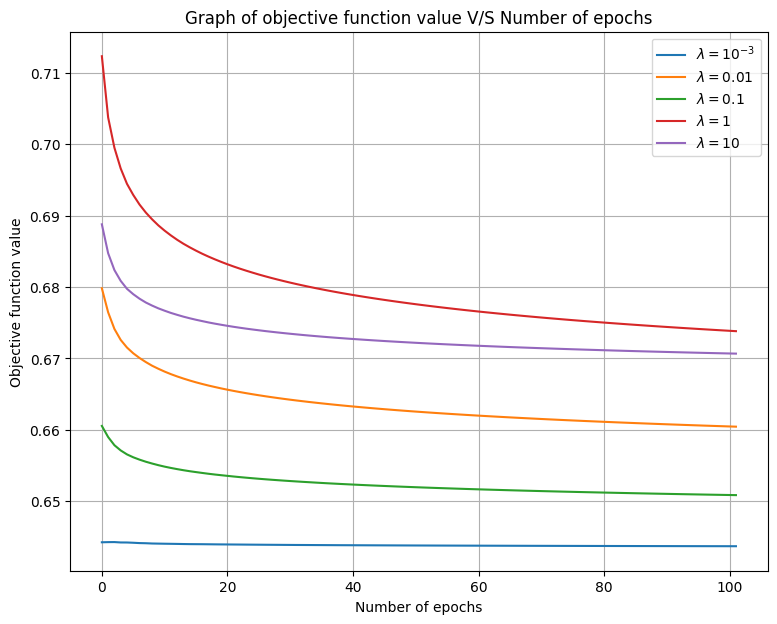

In [31]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_l(train_data,train_label,lamda)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Objective function value")
  plt.title("Graph of objective function value V/S Number of epochs")
  plt.grid()

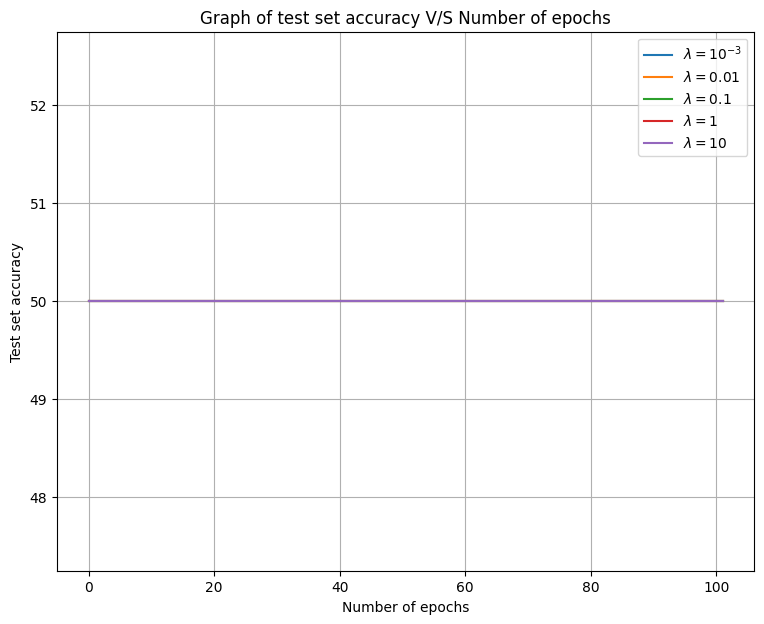

In [32]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_l(train_data,train_label,lamda)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Test set accuracy")
  plt.title("Graph of test set accuracy V/S Number of epochs")
  plt.grid()

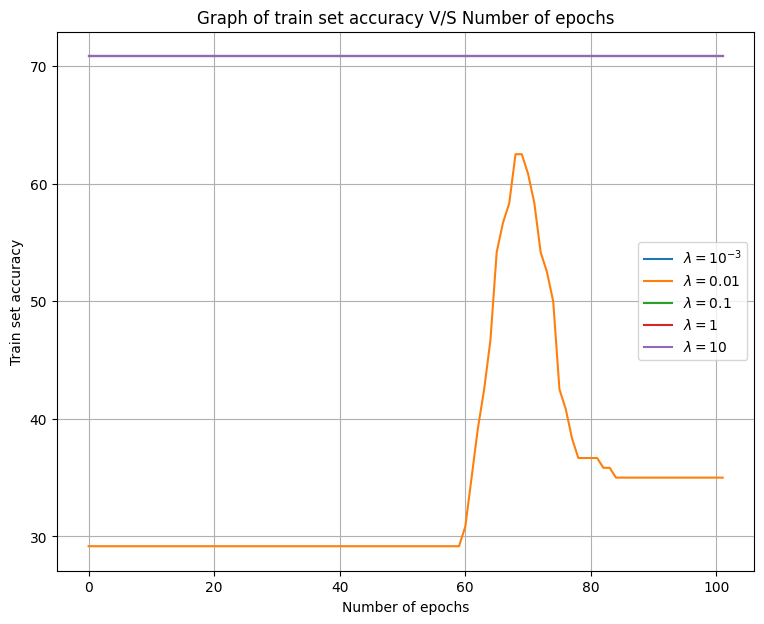

In [33]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_l(train_data,train_label,lamda)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Train set accuracy")
  plt.title("Graph of train set accuracy V/S Number of epochs")
  plt.grid()

In [34]:
from tabulate import tabulate
head = ["Value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT2_l(train_data,train_label,list_of_lamda[i])[3][-1],OPT2_l(train_data,train_label,list_of_lamda[i])[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="fancy_grid"))

╒══════════════════╤═════════════════════╤═════════════════╕
│   Value of lamda │   Training accuracy │   Test accuracy │
╞══════════════════╪═════════════════════╪═════════════════╡
│            0.001 │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.01  │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.1   │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            1     │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│           10     │             70.8333 │              50 │
╘══════════════════╧═════════════════════╧═════════════════╛


###**Squared hinge loss with 1000 epochs**

In [35]:
def compute_loss_sh(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))**2

In [36]:
def compute_objfnval_sh(data,labels,w,lamda):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_sh(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [37]:
def compute_grad_loss_sh(x,y,w,i,lamda):
  l = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/data.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/data.shape[0]
  return l

In [38]:
def OPT1_sh(data, label, lamda, num_epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i,lamda))) 
      t = t+1
    if t>10000:
      t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_sh(data,label,w,lamda))
  return w, fval, list_of_test_acc, list_of_train_acc

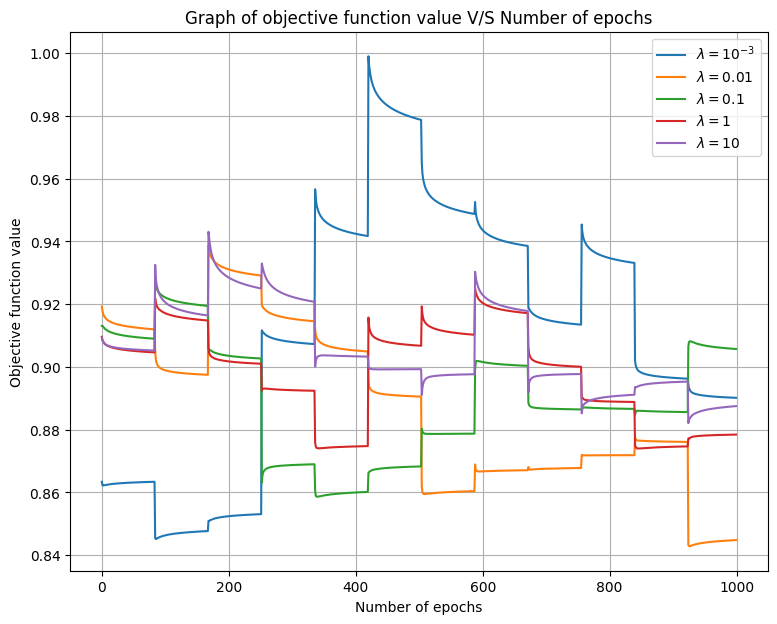

In [39]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_sh(train_data,train_label,lamda,num_epochs)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Objective function value")
  plt.title("Graph of objective function value V/S Number of epochs")
  plt.grid()


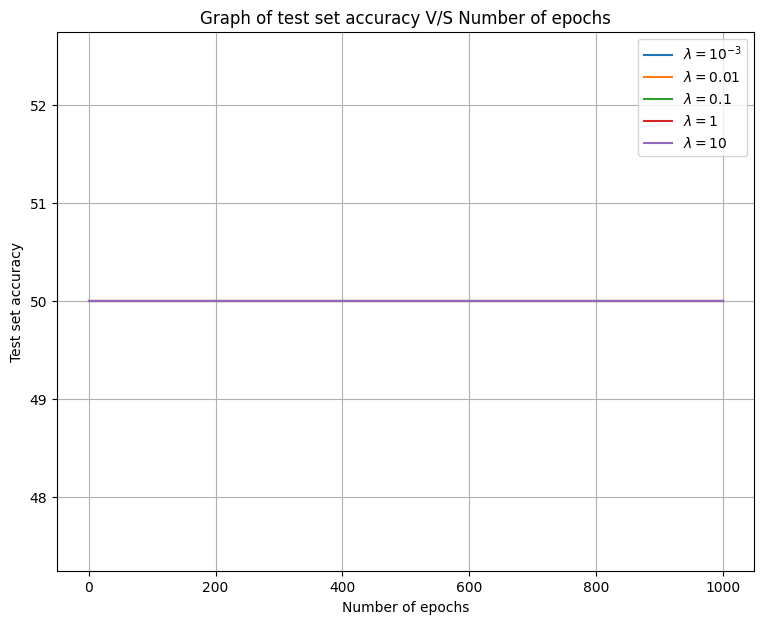

In [40]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_sh(train_data,train_label,lamda,num_epochs)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Test set accuracy")
  plt.title("Graph of test set accuracy V/S Number of epochs")
  plt.grid()

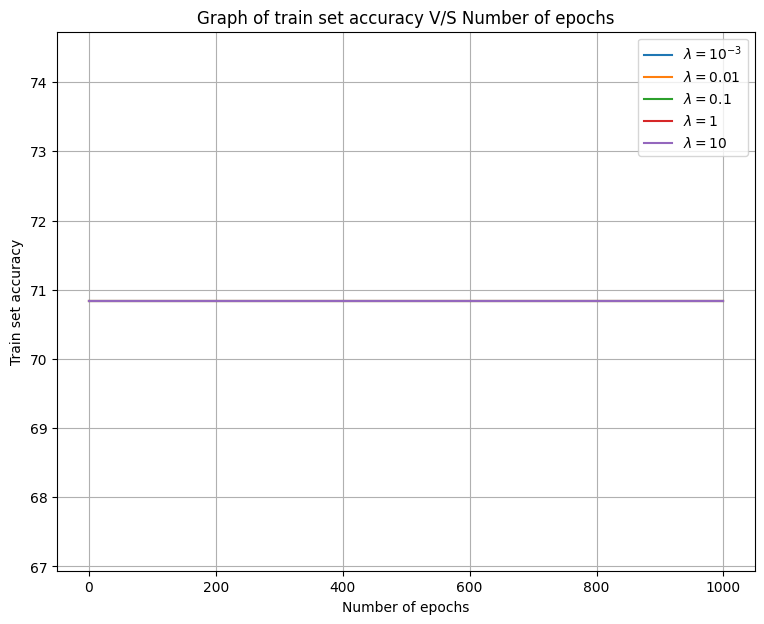

In [41]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_sh(train_data,train_label,lamda,num_epochs)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Train set accuracy")
  plt.title("Graph of train set accuracy V/S Number of epochs")
  plt.grid()

In [42]:
from tabulate import tabulate
head = ["Value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT1_sh(train_data,train_label,list_of_lamda[i],num_epochs)[3][-1],OPT1_sh(train_data,train_label,list_of_lamda[i],num_epochs)[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="fancy_grid"))

╒══════════════════╤═════════════════════╤═════════════════╕
│   Value of lamda │   Training accuracy │   Test accuracy │
╞══════════════════╪═════════════════════╪═════════════════╡
│            0.001 │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.01  │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.1   │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            1     │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│           10     │             70.8333 │              50 │
╘══════════════════╧═════════════════════╧═════════════════╛


### **Squared hinge loss with modified function**

In [43]:
def OPT2_sh(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval= []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i,lamda)))
      t=t+1
      if t>10000:
        t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_sh(data,label,w,lamda))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

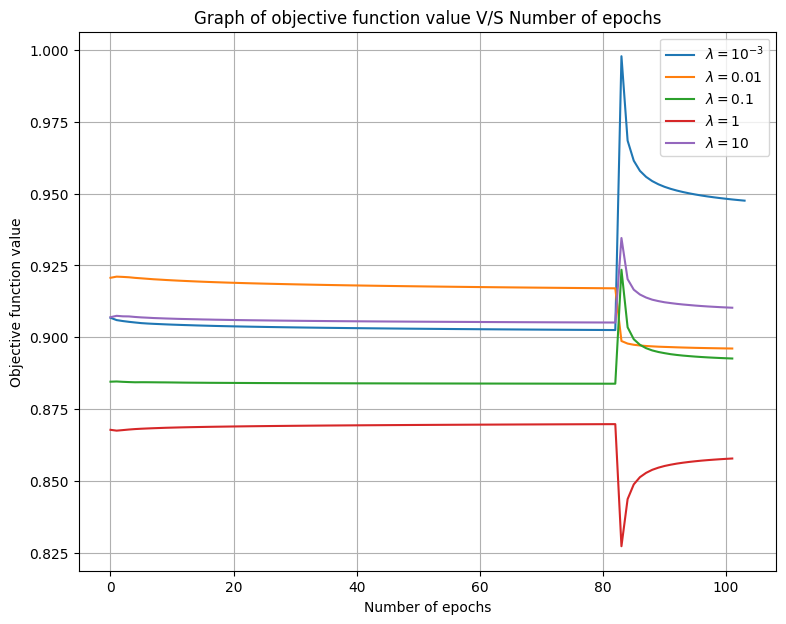

In [44]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_sh(train_data,train_label,lamda)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Objective function value")
  plt.title("Graph of objective function value V/S Number of epochs")
  plt.grid()

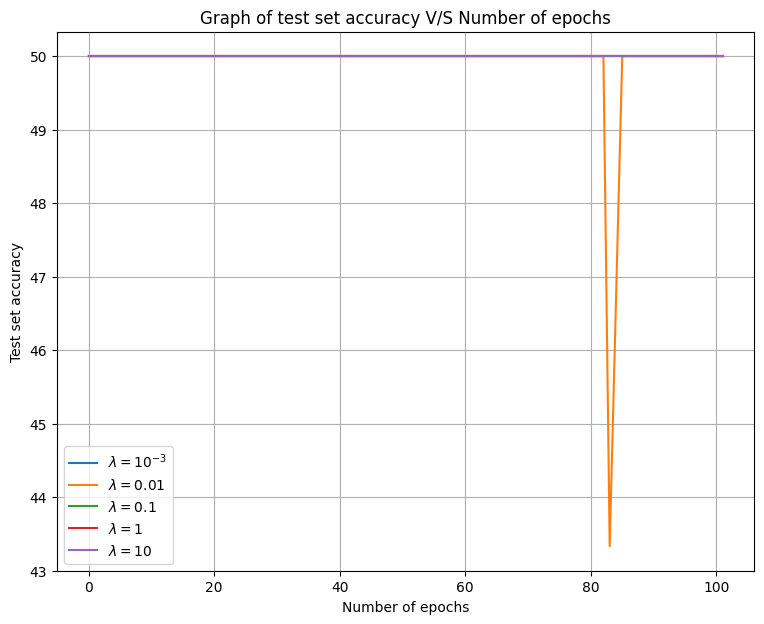

In [45]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_sh(train_data,train_label,lamda)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Test set accuracy")
  plt.title("Graph of test set accuracy V/S Number of epochs")
  plt.grid()

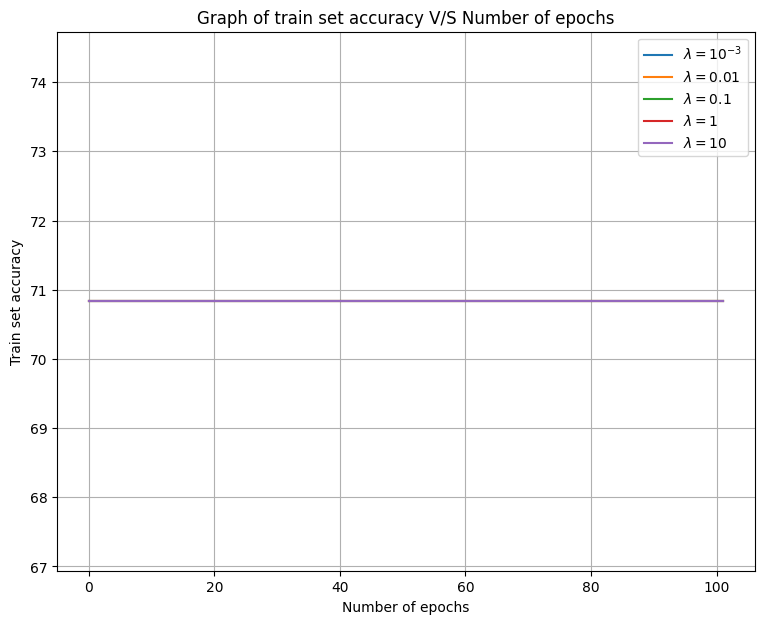

In [46]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_sh(train_data,train_label,lamda)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("Number of epochs")
  plt.ylabel("Train set accuracy")
  plt.title("Graph of train set accuracy V/S Number of epochs")
  plt.grid()

In [47]:
from tabulate import tabulate
head = ["Value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT2_sh(train_data,train_label,list_of_lamda[i])[3][-1],OPT2_sh(train_data,train_label,list_of_lamda[i])[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="fancy_grid"))

╒══════════════════╤═════════════════════╤═════════════════╕
│   Value of lamda │   Training accuracy │   Test accuracy │
╞══════════════════╪═════════════════════╪═════════════════╡
│            0.001 │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.01  │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            0.1   │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│            1     │             70.8333 │              50 │
├──────────────────┼─────────────────────┼─────────────────┤
│           10     │             70.8333 │              50 │
╘══════════════════╧═════════════════════╧═════════════════╛


From all graphs, we see that both test accuracy and train accuracy is either following a zig zag pattern or staying same.\
For each value of lambda the training and testing accuracy are $70.8333\%$ and $50\%$ respectively.